<a href="https://colab.research.google.com/github/ranjith13119/NYC-Taxi-Fare-Prediction/blob/main/NYC_Taxi_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/NYC-Taxi-Fares-Prediction/NYC-Taxi-Fares-Prediction/NYC-Taxi-Fares-Prediction/taxifare.csv")

In [ ]:
dataset.shape 

(120000, 8)

In [ ]:
dataset.describe()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,10.040326,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.347167
std,7.500134,0.471406,0.031497,0.025821,0.032419,0.030279,0.759263
min,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,1.000000
25%,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000
max,49.900000,1.000000,-73.311845,40.981292,-73.496140,40.993498,5.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [ ]:
dataset.head() 

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [ ]:
dataset.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
pd.to_datetime(dataset.pickup_datetime)

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [ ]:
import datetime
dataset.pickup_datetime = pd.to_datetime(dataset.pickup_datetime) - datetime.timedelta(hours = 4)

In [ ]:
dataset['month'] = dataset.pickup_datetime.dt.month

In [ ]:
dataset['Day'] = dataset.pickup_datetime.dt.day
dataset['year'] = dataset.pickup_datetime.dt.year
dataset['hours'] = dataset.pickup_datetime.dt.hour
dataset['minute'] = dataset.pickup_datetime.dt.minute

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   month              120000 non-null  int64              
 9   Day                120000 non-null  int64              
 10  year               120000 non-null  int64              
 11  hours              120000 non-null  int64              
 12  minute             120000 non-

In [ ]:
dataset['weekday'] = dataset.pickup_datetime.dt.weekday

In [ ]:
weekDay = [0,5,6]
def pod(x):
  if x in weekDay:
    return 1
  else:
    return 0

In [ ]:
dataset['WeekEnd'] = dataset['weekday'].apply(pod)

In [ ]:
dataset.drop(['weekday', 'pickup_datetime'], axis = 1, inplace = True)

In [ ]:
dataset['Session'] = np.where(dataset['hours']<12, 0 , 1)

Calculate the distance bw the locations

In [ ]:
def haversine(df):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1= np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
    dlat = np.radians(df['dropoff_latitude']-df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [ ]:
dataset['Total distance'] = haversine(dataset)

In [ ]:
dataset.drop(['pickup_latitude', 'dropoff_latitude', 'dropoff_longitude', 'pickup_longitude'], axis = 1, inplace = True) 

In [ ]:
dataset.head() 

,fare_amount,fare_class,passenger_count,month,Day,year,hours,minute,WeekEnd,Session,Total distance
0,6.5,0,1,4,19,2010,4,17,1,0,2.126312
1,6.9,0,1,4,17,2010,11,43,1,0,1.392307
2,10.1,1,2,4,17,2010,7,23,1,0,3.326763
3,8.9,0,1,4,11,2010,17,25,1,1,1.864129
4,19.7,1,1,4,16,2010,22,19,0,1,7.231321


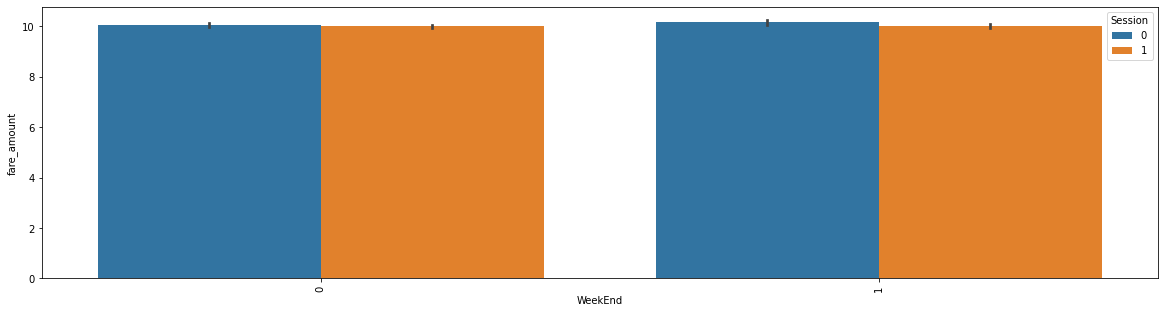

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.barplot(x = dataset.WeekEnd, y = dataset.fare_amount, hue= dataset.Session)
plt.xticks(rotation=90)
plt.show()

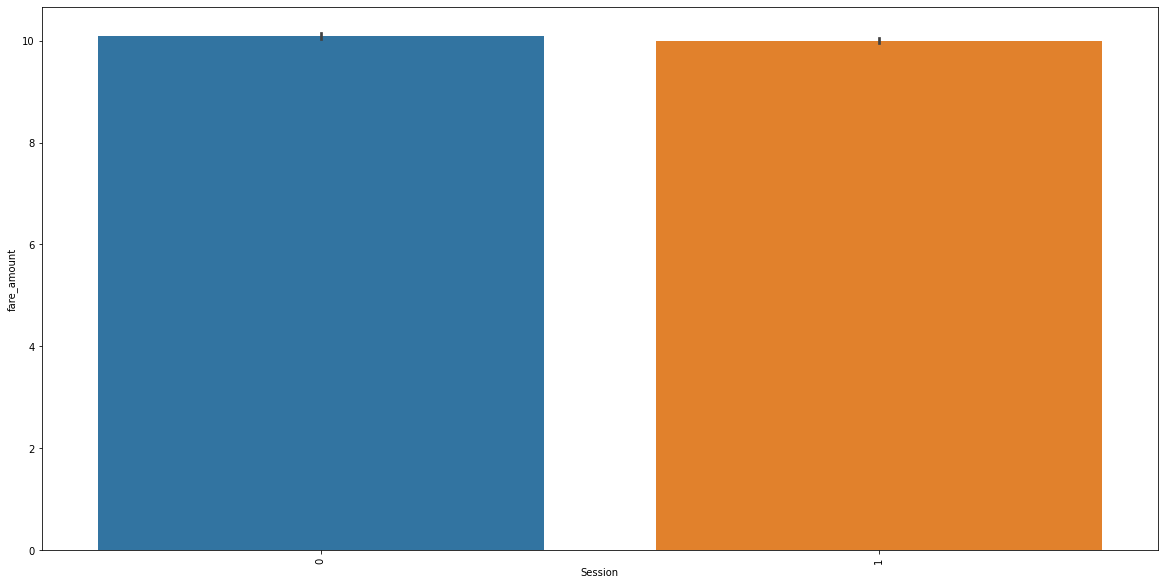

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(x = dataset.Session, y = dataset.fare_amount)
plt.xticks(rotation=90)
plt.show()

comparing weekdays and weekends
Comparing Morning and Evening = > There is no much different in price 

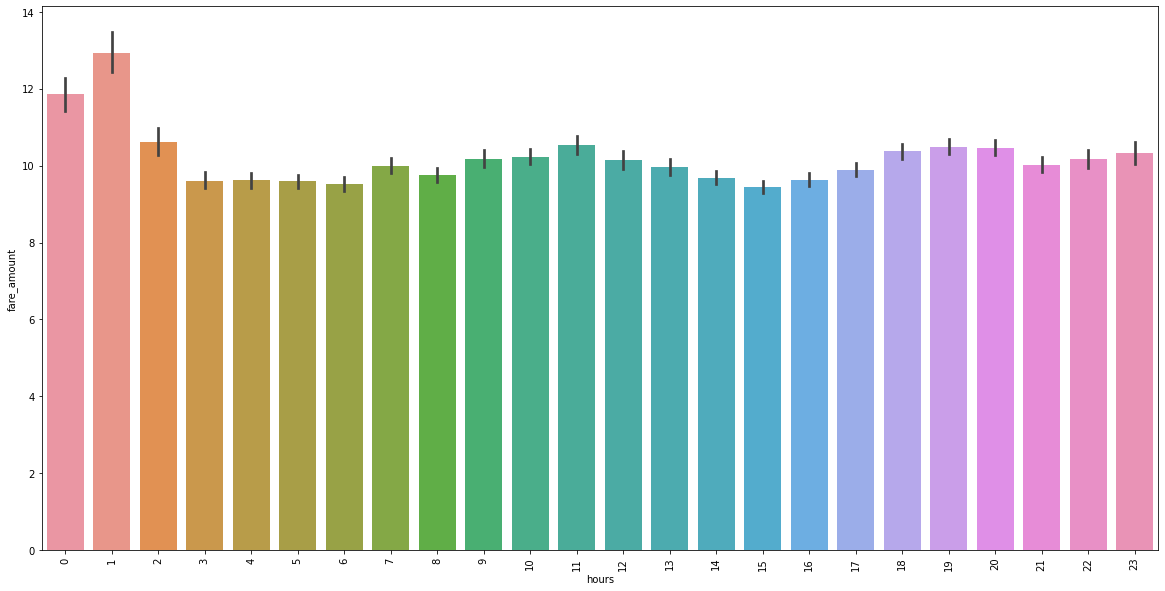

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(x = dataset.hours, y = dataset.fare_amount)
plt.xticks(rotation=90)
plt.show()

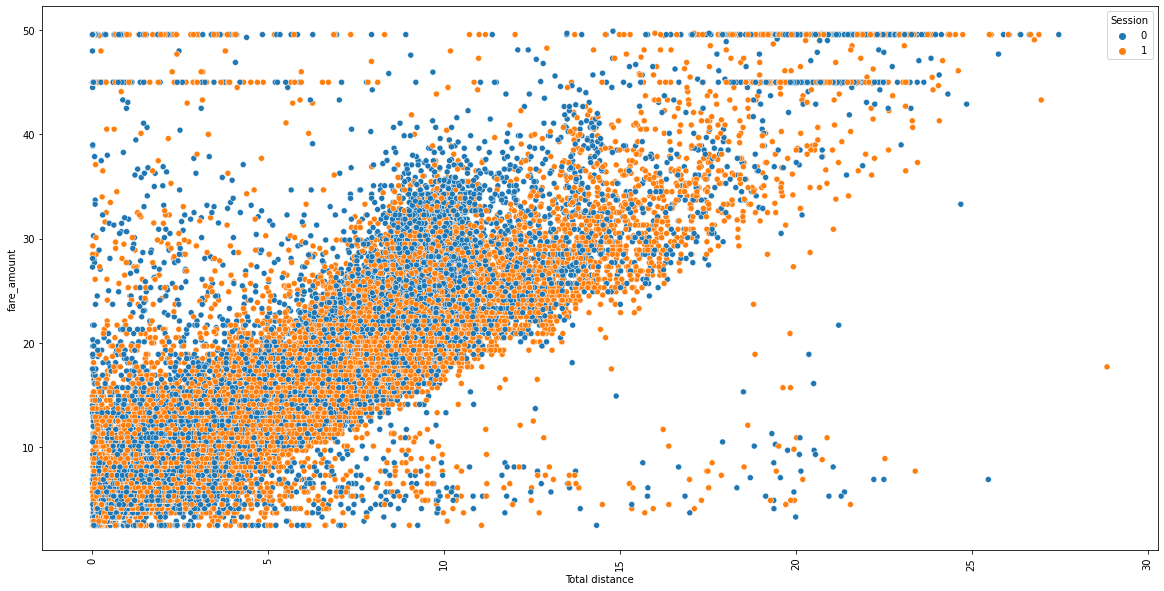

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.scatterplot(x = dataset['Total distance'], y = dataset.fare_amount, hue=dataset.Session)
plt.xticks(rotation=90)
plt.show()

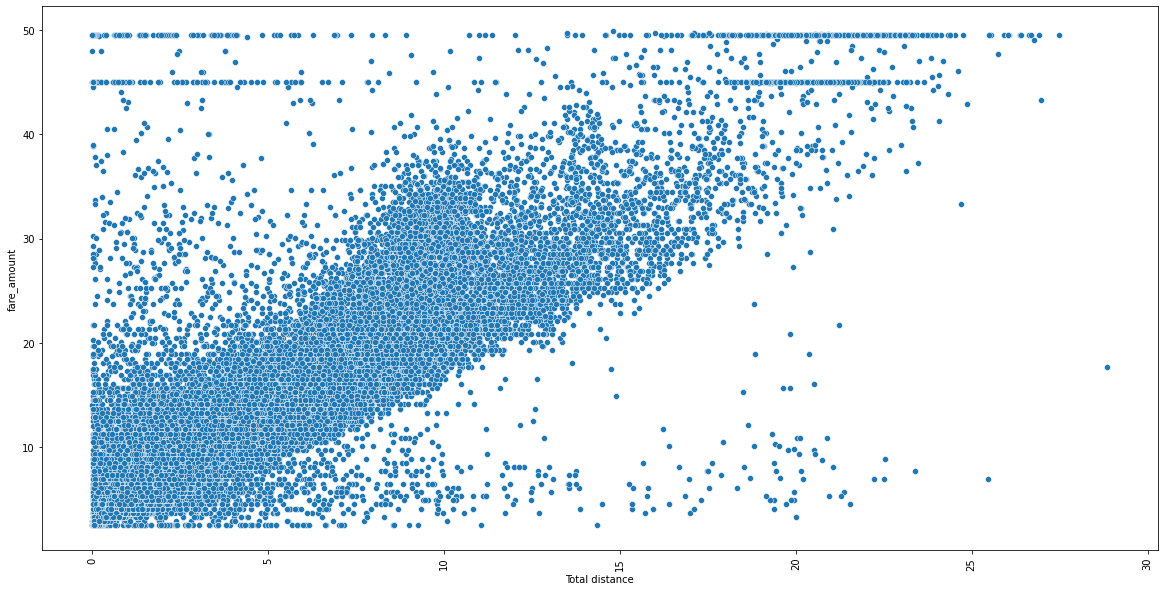

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.scatterplot(x = dataset['Total distance'], y = dataset.fare_amount)
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

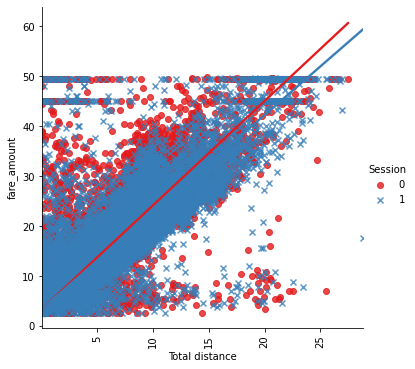

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.lmplot(x = 'Total distance', y = 'fare_amount', data = dataset,  hue="Session", markers=["o", "x"], palette="Set1")
plt.xticks(rotation=90)
plt.show()

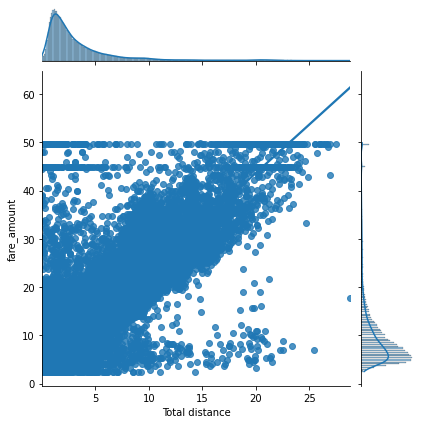

In [ ]:
sns.jointplot(x = 'Total distance', y = 'fare_amount', data=dataset, kind="reg")

In [ ]:
X = dataset.drop(['fare_amount'], axis = 1)
y = dataset.fare_amount

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model_Extra = ExtraTreesRegressor()
model_Extra.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

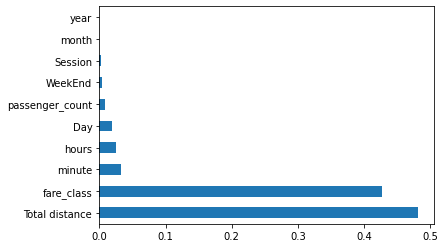

In [ ]:
feat_importance = pd.Series(model_Extra.feature_importances_, index = X.columns) 
feat_importance.nlargest(10).plot(kind='barh') 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27) 

In [ ]:
X_train.shape

(90000, 10)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_reg_info = mutual_info_regression(X_train, y_train)

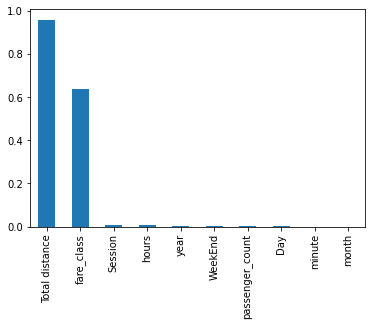

In [ ]:
mutual_reg_info = pd.Series(mutual_reg_info)
mutual_reg_info.index = X_train.columns 
mutual_reg_info.sort_values(ascending=False).plot.bar()

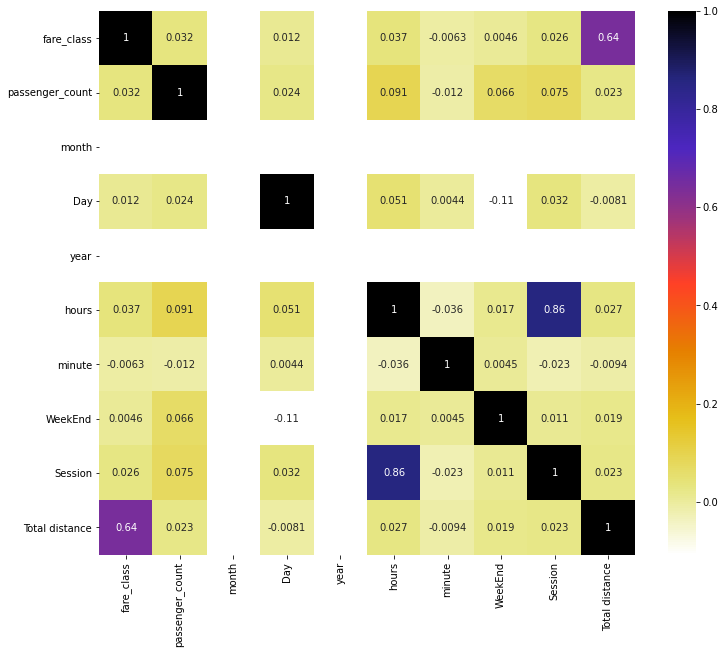

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.5) # remove the feature which is having the low variance. because of these low variance our feature is constant and it will not help to improve the model performance
selector.fit(X_train)

VarianceThreshold(threshold=0.5)

In [ ]:
X_train.columns[selector.get_support()]

Index(['passenger_count', 'Day', 'hours', 'minute', 'Total distance'], dtype='object')

I have tried VarianceThreshold, ExtraTreesRegressor, mutual_info_regression, Correlation matrix for the feature selection and it is clear that all the features are significantly contributing to the Taxi fare. So I'm not going to remove any feature. 

In [ ]:
import scipy.stats as stat
import pylab
def plot_feature_distribution(df, feature):
  plt.figure(figsize=(15,3))
  plt.subplot(1,3,1)
  df[feature].hist()
  plt.subplot(1,3,2)
  sns.boxplot(df[feature])
  plt.subplot(1,3,3)
  stat.probplot(df[feature],dist='norm',plot=pylab)
  plt.show()

fare_class


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


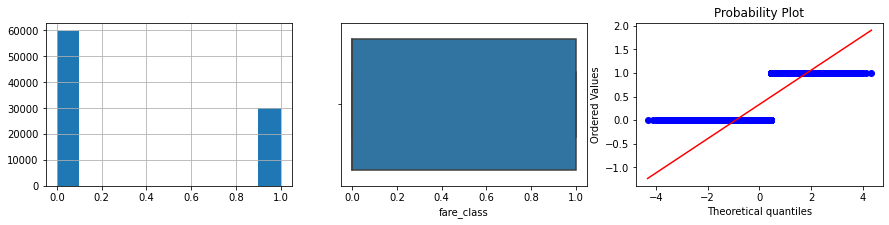

passenger_count


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


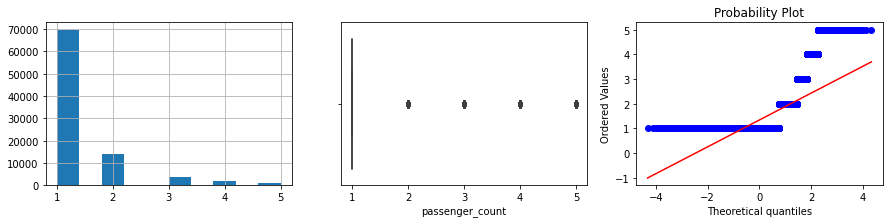

month


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


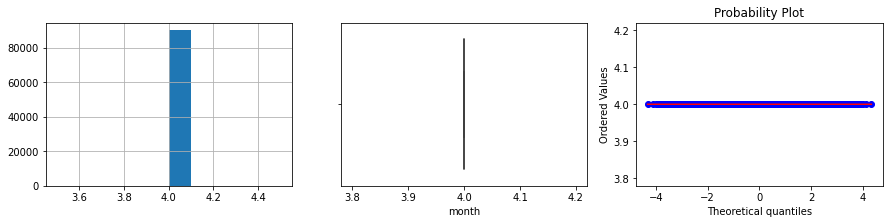

Day


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


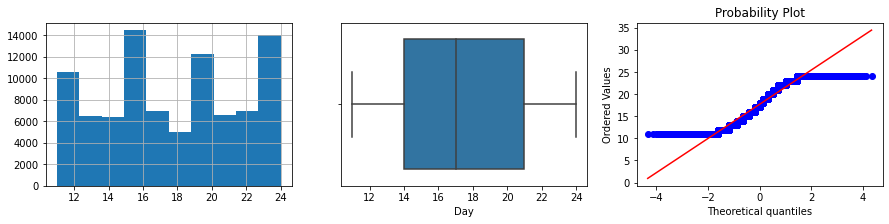

year


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


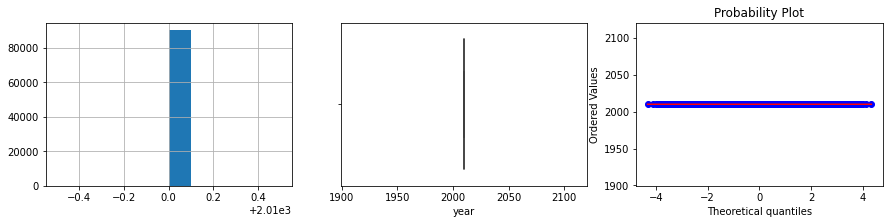

hours


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


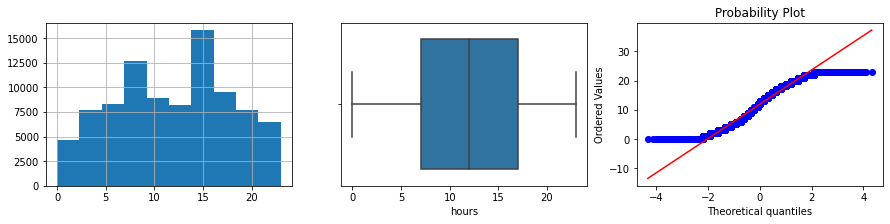

minute


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


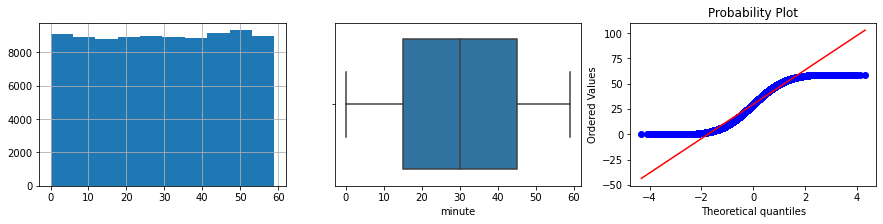

WeekEnd


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


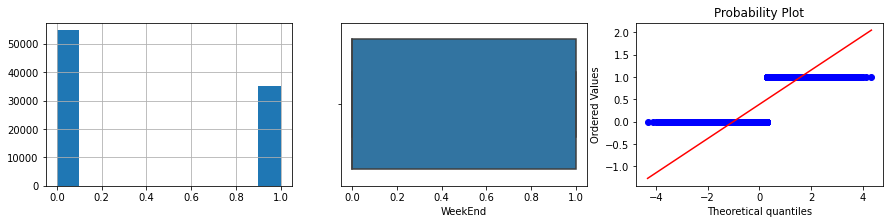

Session


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


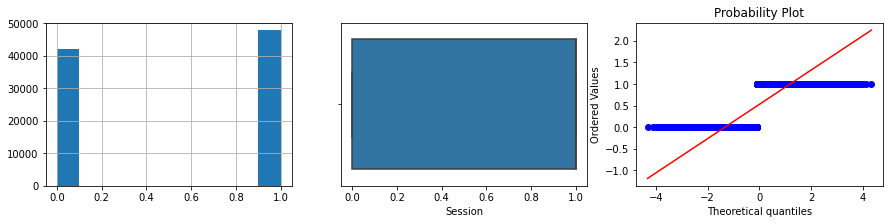

Total distance


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


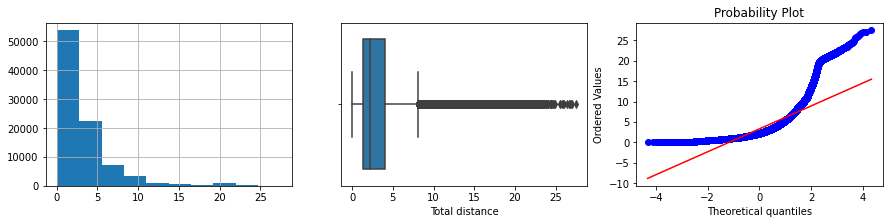

In [ ]:
for feature in X_train.columns:
  print(feature)
  plot_feature_distribution(X_train, feature) 

In [ ]:
def plot_feature_distribution(df, feature):
  plt.figure(figsize=(15,3))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot((df[feature]),dist='norm',plot=pylab)
  plt.show()

Day


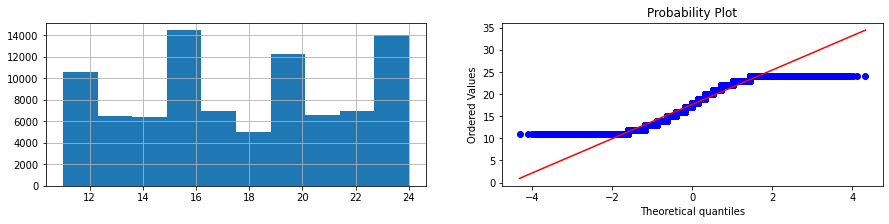

hours


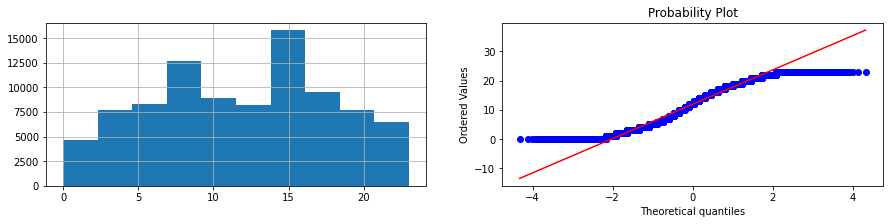

minute


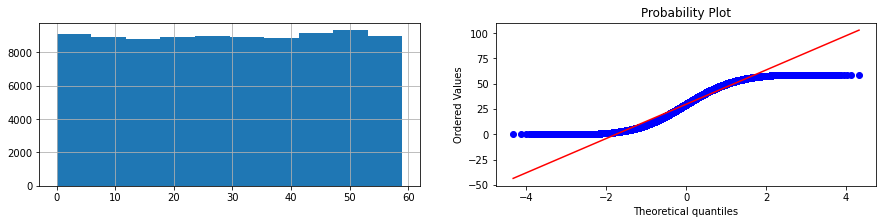

Total distance


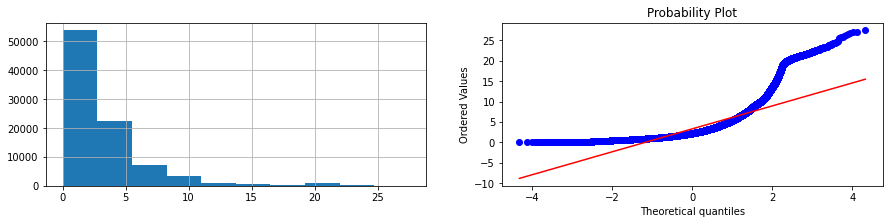

In [ ]:
for feature in ["Day", "hours", "minute", "Total distance"]:
  print(feature)
  plot_feature_distribution(X_train, feature) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


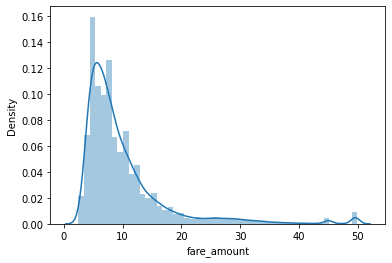

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


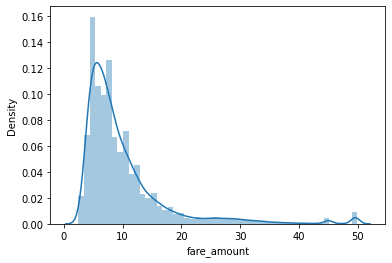

In [ ]:
sns.distplot(dataset.fare_amount)

I'm not going to scale the feature as i'm going to apply ensemble models.

In [155]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [161]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [162]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 250, 400, 550, 700], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [164]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
best_params_ = {'n_estimators': 100, 'min_samples_split': 100, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 30}

In [173]:
rf_random = RandomForestRegressor(
    n_estimators = 100, 
    min_samples_split = 100, 
    min_samples_leaf = 10, 
    max_features = "auto", 
    max_depth = 30, 
    random_state=42)

rf_random.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [174]:
y_pred=rf_random.predict(X_test)

In [175]:
predictions=rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


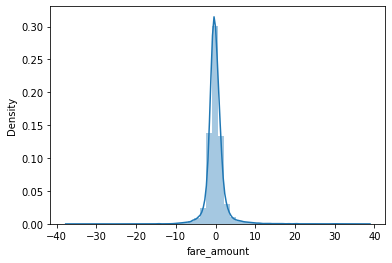

In [176]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [177]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 1.4047328523769662
MSE: 6.613776920328282
RMSE: 2.5717264474139316


In [178]:
import xgboost as xgb
xg_regressor=xgb.XGBRegressor()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

In [182]:
xg_random = RandomizedSearchCV(estimator = xg_regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 
[17:56:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total= 6.9min
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 
[18:03:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.9min remaining:    0.0s


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total= 7.0min
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 
[18:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total= 7.0min
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 
[18:17:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total= 7.0min
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 
[18:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 86.4min finished


In [ ]:
predictions=xg_random.predict(X_test)

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU, LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [ ]:
annClassifier = Sequential()

In [ ]:
annClassifier.add(Dense(units = 128, activation= "relu", kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
annClassifier.add(Dense(units = 256, activation= "relu", kernel_initializer='he_uniform'))
annClassifier.add(Dense(units = 256, activation= "relu", kernel_initializer='he_uniform'))
annClassifier.add(Dense(units = 256, activation= "relu", kernel_initializer='he_uniform'))

annClassifier.add(Dense(units = 1, activation= "linear", kernel_initializer = "normal"))
annClassifier.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
annClassifier.summary()

In [ ]:
 model_history=annClassifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 20)

In [ ]:
predictions=annClassifier.predict(X_test)

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
from tpot import TPOTRegressor

In [ ]:
regressor = TPOTRegressor()
regressor.fit(X_train, y_train)

In [ ]:
tpot = TPOTRegressor(generation = 1, population_size = 10, verbosity = 2, random_state = 42)
tpot.fit(X_train, y_train)

In [ ]:
print(tpot.score(X_test, y_test))
tpot.export("/content/drive/MyDrive/NYC-Taxi-Fares-Prediction/NYC-Taxi-Fares-Prediction/NYC-Taxi-Fares-Prediction/pipelin.py")